# Perform a meta-analysis

The replication and update of the meta-analysis is performed thanks to a Python Package. All values required to perform the meta-analysis are stored in a csv file. All csv files used in *Bussalb et al.* are available:
1. for the replication with our choices: 
   * *values_total_meta_analysis_cortese.csv*, 
   * *values_inattention_meta_analysis_cortese.csv*, 
   * *values_hyperactivity_meta_analysis_cortese.csv*;
2. for the update: 
   * *values_total_meta_analysis.csv*, 
   * *values_inattention_meta_analysis.csv*, 
   * *values_hyperactivity_meta_analysis.csv*;
3. for the subgroup analysis: 
   * standard protocol: 
     * *values_total_meta_analysis_sd.csv*, 
     * *values_inattention_meta_analysis_sd.csv*, 
     * *values_hyperactivity_meta_analysis_sd.csv*;   
   * low/no medication: 
     * *values_total_meta_analysis_wm.csv*, 
     * *values_inattention_meta_analysis_wm.csv*,
     * *values_hyperactivity_meta_analysis_wm.csv*.

Meta-analysis can be run for three outcomes: total, inattention and hyperactivity.

## Import raw data

The name of the csv file to import must be modified according to the outcome we want to study. Do not forget to change the path given in ```sys.path.append```, it corresponds to the path where the packages are.

In [1]:
import numpy as np
import scipy.stats as scp
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.display import display
import sys

# Add the path where the packages are
sys.path.append(r"C:\Users\Aurore Bussalb\Desktop\github_repo\source")
import meta_analysis.import_csv_for_meta_analysis as icm
import meta_analysis.perform_meta_analysis as pma

%matplotlib inline

# Import data from a csv file
df_parents, df_teachers = icm.import_csv(r"data-replication\values_total_meta_analysis_cortese.csv")

## Run the meta-analysis

If you want to run the meta-analysis on parents assessments put ```df_parents``` as ```run_meta_analysis``` first argument, otherwise put ```df_teachers```. For more information, see the documentation of that module in ```documentation\package-documentation```.

In [2]:
# Results per study
df_results_per_study, df_results = pma.run_meta_analysis(df_parents)
display(df_results_per_study)

,95% Confidence interval of the ES,Effect size,Standard Error of the ES,Weight,Year
Bakhshayesh,"(-1.56662730546, 0.00637572245143)",-0.780126,0.401276,7.207052,2011
Beauregard,"(-2.57759670661, 0.150008119118)",-1.213794,0.695818,2.965914,2006
Bink,"(-0.521766137824, 0.458431030637)",-0.031668,0.250050,12.775565,2014
Christiansen,"(-0.256845525397, 1.41978529491)",0.581470,0.427712,6.569916,2014
Gevenlesben,"(-0.983496109633, -0.0823758261328)",-0.532936,0.229878,13.825537,2009
Heinrich,"(-1.94195716809, 0.185718188896)",-0.878119,0.542774,4.529531,2004
Maurizio,"(-1.18517798013, 0.507489334425)",-0.338844,0.431803,6.478028,2014
VanDongen,"(-0.811062376013, 0.459514524085)",-0.175774,0.324127,9.579446,2013
Steiner2014,"(-0.878226933433, 0.108857350947)",-0.384685,0.251807,12.687809,2014
Holtmann,"(-0.627934235248, 0.785090904343)",0.078578,0.360466,8.356655,2009


The effect size between subject is computed for each study as long with its standard error and its 95% confidence interval. The weight associated to each study is displayed too. A negative effect size is in favor of Neurofeedback.

In [3]:
# Results of the meta-analysis
display(df_results)

,Chi2,p-value Heterogeneity,Tau2,Summary Effect,Variance Summary Effect,Standard Error Summary Effect,95% Confidence Interval of the Summary Effect,p-value,Heterogeneity
Results,17.931732,0.117779,0.064955,-0.315805,0.016286,0.127618,"(-0.565936042992, -0.0656735648961)",0.013338,33.079525


Results of the meta-analysis are presented here. A negative summar effect is in favor of Neurofeedback.

## Display the forest plot

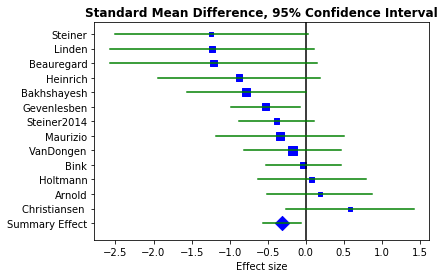

In [4]:
forest_plot = pma.forest_plot(df_results_per_study, df_results)

Negative effect sizes are in favor of Neurofeedback.